# Linear Regression Using Simulated Data

Using `pandas` and `numpy`, let’s simulate some data and look at how the predicted values (*Y<sub>e</sub>*) differ from the actual value (*Y*).

### Simulating data:
- For *X*, we generate 100 normally distributed random numbers with mean 1.5 and standard deviation 2.5. 

- For predicted value *Y<sub>e</sub>*, we assume an intercept (α) of 2 and a slope (β) of 0.3 and we write ![](https://latex.codecogs.com/gif.latex?Y_e%20%3D%202%20+%200.3x)

    Later, we will estimate the values of α and β using the least squares method and see how that changes the efficacy of the model. 

- Though we estimate $Y_e = \alpha + \beta X$, in reality Y is rarely perfectly linear. It usually has an error component or **residual** – $Y = \alpha + \beta X + R$, where *R* is a random variable and is assumed to be normally distributed.
    
    Therefore for the actual value *Y*, we add a residual term (`res`), a random variable distributed normally with mean 0 and a standard deviation of 0.5.

The following cell shows the code snippet to generate these numbers and convert these three columns in a data frame. Read through the code carefully and run the cell to output a sample of our simulated data.

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Generate 'random' data
np.random.seed(0)                      # fixed seed: each run gives the same random numbers so the same outputs. Commenting out this line would read similar but differentoutputs at each run. Try it out!
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
ypred = 2 + 0.3 * X                    # Prediction of Y, assuming a = 2, b = 0.3
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
yact = 2 + 0.3 * X + res               # Actual values of Y

# Create pandas dataframe to store our X, ypred, and yact values
df = pd.DataFrame(
    {'X': X,
     'ypred': ypred,
     'yact': yact}
)

In [2]:
# Show the first five rows of our dataframe
df.head()

,X,ypred,yact
0,5.910131,3.773039,4.714615
1,2.500393,2.750118,2.076238
2,3.946845,3.184053,2.548811
3,7.102233,4.130670,4.615368
4,6.168895,3.850668,3.264107


Now let’s plot both the actual output (`yact`) and predicted output (`ypred`) against the input variable (`X`) to see what the difference between `yact` and `ypred` is, and therefore, to see how accurately the proposed equation (`ypred = 2 + 0.3 * X`) has been able to predict the value of the output:

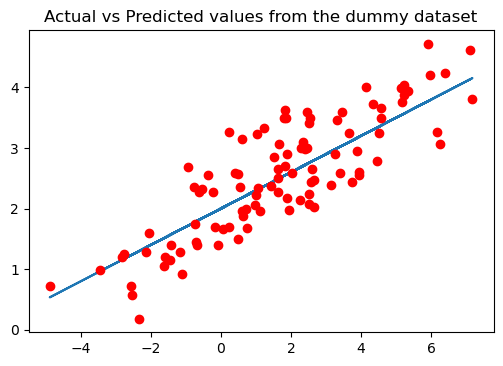

In [3]:
import matplotlib.pyplot as plt

# Plot prediction as blue line, actual values of Y as red markers
plt.figure(dpi=100)
plt.plot(X, ypred)
plt.plot(X, yact, 'ro')
plt.title('Actual vs Predicted values from the dummy dataset')

plt.show()

### Model efficacy

How do we know the values we calculate for α and β are giving us a good model? We can explain the total variability in our model with the **Total Sum of Squares** or SST:

$$SST = \sum_{i=1}^n\Bigl(\text{yact}_i - \text{yavg}\Bigr)^2, \qquad\qquad \text{yavg}=\frac1n \sum_{i=1}^n \text{yact}_i$$
            
Mathematically, we have

$$ \sum_{i=1}^n\Bigl(\text{yact}_i - \text{yavg}\Bigr)^2
= \sum_{i=1}^n\Bigl(\text{ypred}_i -\text{yavg} \Bigr)^2
+ \sum_{i=1}^n\Bigl(\text{yact}_i - \text{ypred}_i\Bigr)^2$$

The identity reads as 

**Total Sum of Squares**  = **Regression Sum of Squares** + **Difference Sum of Squares**,

or simply ,  

**SST** = **SSR** + **SSE**.

The Regression Sum of Squares or SSR measures the variation of the regression/predicted values, and the Difference Sum of Squares SSD the variation between the actual and the predicted values.  

An alternative saying is that SSR is the difference explained by the model, SSD is the difference not explained by the model and is random, and SST is the total error.

<img src="./sumOfSquares.png" title="SST consists of SSR (the variance explained by the model) and SSD (the variance not explained by the model)." />

### *R-Squared*

The higher the ratio of SSR to SST, the better the model is. This ratio is quantified by the **coefficient of determination** (also known as ***R<sup>2</sup>*** or ***R*-squared**):

$$ R^2= \frac{SSR}{SST}$$. 

Since $SST= SSR+SSD$, $\qquad 0\le R^2\le 1$.  

The closer it is to 1, the better the model. Note that there are many other factors that we need to analyse before we can conclude a linear regression model is effective, but a high $R^2$ is a pretty good indicator.

Let’s see what the value of $R^2$ is for our simulated dataset.

In [4]:
# Calculate the mean of Y
ymean = np.mean(yact)
print(f'Mean of Y = {ymean}')

# Calculate SSR and SST
df['SSR'] = (df['ypred'] - ymean)**2
df['SST'] = (df['yact'] - ymean)**2
SSR = df['SSR'].sum()
SST = df['SST'].sum()

# Calculate R-squared
R2 = SSR / SST
print(f'R2 = {R2}')

Mean of Y = 2.5358624970247825
R2 = 0.6185994959777246


The value of $R^2=0.618$ suggests that `ypred` provides a decent prediction of the `yact`. 

We have randomly assumed some values for $\alpha$  and $\beta$, but these may or may not be the best values. In the next step, we will use the least sum of square method to calculate the optimum value for $\alpha$ and $\beta$ to see if there is an improvement in $R^2$.

To get started on the next step, open the notebook called `Reg2_LeastSquaresUsingSimulatedData.ipynb`.